# Regresión lineal Ridge.

Se le conoce como regresión contraída.<br>
Aprende w y b usando el criterio de los cuadrados, pero añade una penalización a las grandes variaciones en los parámetros w:\begin{equation*}
    RSS_{RIDGE_{(w,b)}}=\sum_{i=1}^N(\gamma_i-(w*x_i+b))^2+\alpha\sum_{j=1}^Pw_j^2.
\end{equation*}

Es parámetro añadido es llamado $\textbf{regularización}$. Proviene el overfitting restringiendo el modelo.<br>
La influencia de la regularización del modelo es controlada, como podemos observar, por el parámetro $\alpha$.

Para este tipo de regresión debemos realizar un preprocesado de los datos, en este caso una $\textbf{normalización}$. Ahora mismo no ahondaremos en la normalización, ya que no es pertinente para este momento. Usaremos escalado MinMax:
\begin{equation*}
    x_i'=\frac{x_i-x_i^{MIN}}{x_i^{MAX}-x_i^{MIN}}
\end{equation*}


<IPython.core.display.Javascript object>


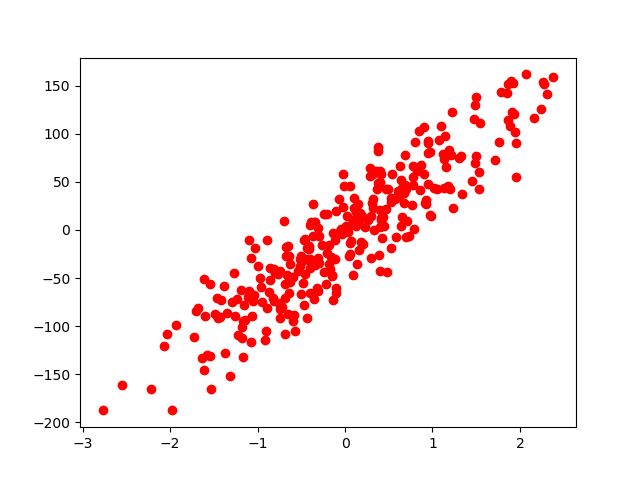

In [1]:
%matplotlib notebook
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X,y=make_regression(n_samples=300,n_features=1,n_informative=1,noise=30,random_state=0)

plt.figure()
plt.plot(X,y,'ro')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Creamos el paramétro de normalización y normalizamos los datos:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=0)
ridge=Ridge(alpha=20.0).fit(X_train,y_train)

In [3]:
print('Intercept: {:.3f}.'.format(ridge.intercept_))
print('Coef: {}.'.format(ridge.coef_))
print('R-squared train: {:.3f}.'.format(ridge.score(X_train,y_train)))
print('R-squared test: {:.3f}.'.format(ridge.score(X_test,y_test)))

Intercept: -56.747.
Coef: [96.92258886].
R-squared train: 0.413.
R-squared test: 0.405.


Veamos el resultado gráficamente.

<IPython.core.display.Javascript object>


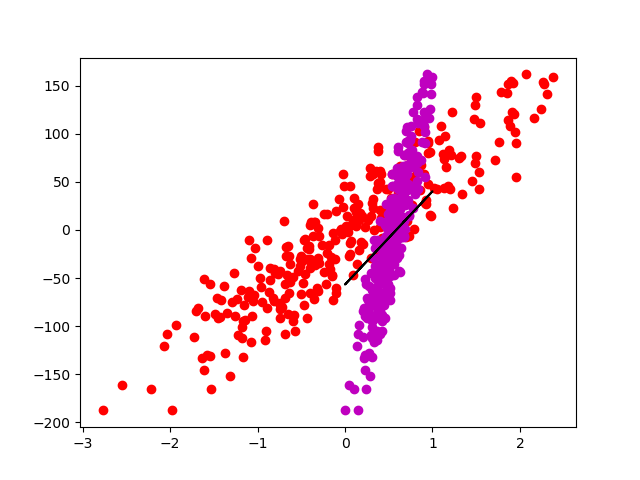

In [4]:
plt.figure()
plt.plot(X,y,'ro')
plt.plot(X_scaled,y,'mo')
plt.plot(X_scaled,X_scaled*ridge.coef_+ridge.intercept_,'k-')

Probemos con otros valor para alfa.

In [5]:
this_alpha=[0.01,1,10]
for x in this_alpha:
    ridge=Ridge(alpha=x).fit(X_train,y_train)
    print('Para alfa {}:'.format(x))
    print('Intercept: {:.3f}.'.format(ridge.intercept_))
    print('Coef: {}.'.format(ridge.coef_))
    print('R-squared train: {:.3f}.'.format(ridge.score(X_train,y_train)))
    print('R-squared test: {:.3f}.'.format(ridge.score(X_test,y_test)))
    print('')

Para alfa 0.01:
Intercept: -184.416.
Coef: [333.61189242].
R-squared train: 0.833.
R-squared test: 0.813.

Para alfa 1:
Intercept: -165.001.
Coef: [297.61752636].
R-squared train: 0.823.
R-squared test: 0.805.

Para alfa 10:
Intercept: -85.511.
Coef: [150.24777179].
R-squared train: 0.581.
R-squared test: 0.570.



Dibujemos el mejor de los 3 casos, con alfa=0.01.

<IPython.core.display.Javascript object>


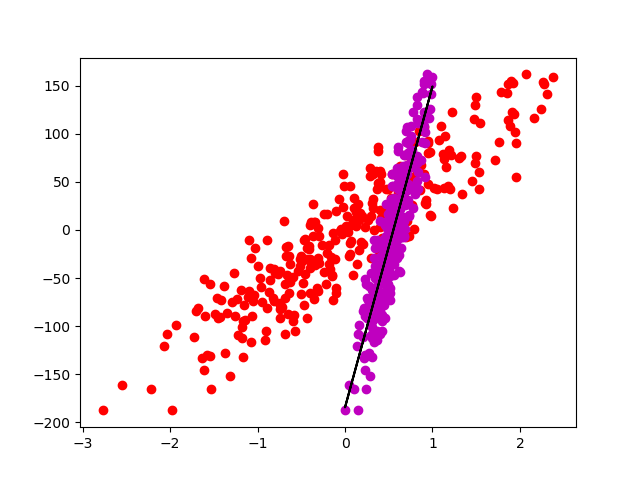

In [6]:
ridge=Ridge(alpha=0.01).fit(X_train,y_train)

plt.figure()
plt.plot(X,y,'ro')
plt.plot(X_scaled,y,'mo')
plt.plot(X_scaled,X_scaled*ridge.coef_+ridge.intercept_,'k-')

# Regresión Lineal Lasso.

La penalización de este modelo disminuye la suma de los valores absolutos de los coeficientes:
\begin{equation*}
    RSS_{LASSO{(w,b)}}=\sum_{i=1}^N(\gamma_i-(w*x_i+b))^2+\alpha\sum_{j=1}^P|w_j|.
\end{equation*}    

Este modelo tiene el efecto de poner el peso del parámetro w a cero para las variables menos influyentes. A este tipo de solución se le conoce como solución dispersa.

<IPython.core.display.Javascript object>


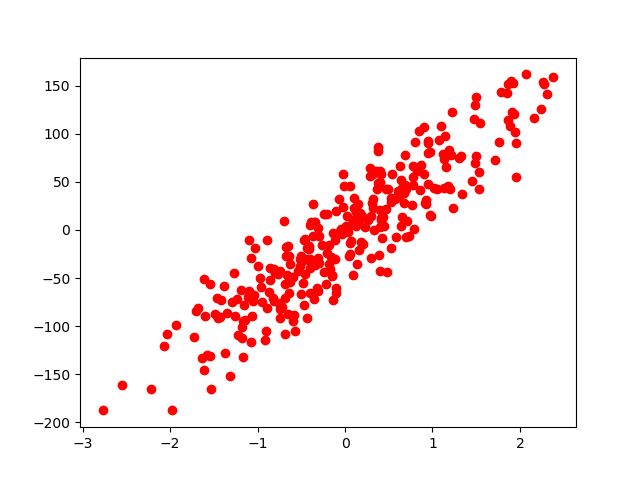

In [7]:
%matplotlib notebook
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X,y=make_regression(n_samples=300,n_features=1,n_informative=1,noise=30,random_state=0)

plt.figure()
plt.plot(X,y,'ro')

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Creamos el paramétro de normalización y normalizamos los datos:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=0)
lasso=Lasso(alpha=2.0,max_iter=10000).fit(X_train,y_train)

In [9]:
print('Intercept: {:.3f}.'.format(lasso.intercept_))
print('Coef: {}.'.format(lasso.coef_))
print('R-squared train: {:.3f}.'.format(lasso.score(X_train,y_train)))
print('R-squared test: {:.3f}.'.format(lasso.score(X_test,y_test)))

Intercept: -154.947.
Coef: [278.97920807].
R-squared train: 0.810.
R-squared test: 0.793.


Dibujemos el resultado.

<IPython.core.display.Javascript object>


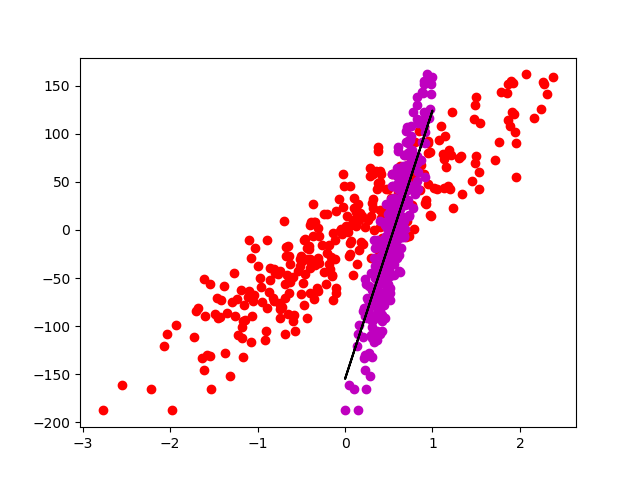

In [10]:
plt.figure()
plt.plot(X,y,'ro')
plt.plot(X_scaled,y,'mo')
plt.plot(X_scaled,X_scaled*lasso.coef_+lasso.intercept_,'k-')

Probemos con diferentes valores de alfa.

In [11]:
this_alpha=[0.01,1,10]
for x in this_alpha:
    lasso=Lasso(alpha=x,max_iter=10000).fit(X_train,y_train)
    print('Para alfa {}:'.format(x))
    print('Intercept: {:.3f}.'.format(lasso.intercept_))
    print('Coef: {}.'.format(lasso.coef_))
    print('R-squared train: {:.3f}.'.format(lasso.score(X_train,y_train)))
    print('R-squared test: {:.3f}.'.format(lasso.score(X_test,y_test)))
    print('')

Para alfa 0.01:
Intercept: -184.488.
Coef: [333.7447386].
R-squared train: 0.833.
R-squared test: 0.813.

Para alfa 1:
Intercept: -169.792.
Coef: [306.49957517].
R-squared train: 0.827.
R-squared test: 0.809.

Para alfa 10:
Intercept: -36.193.
Coef: [58.81627125].
R-squared train: 0.267.
R-squared test: 0.261.



Veamos un mal resultado con lasso, con alfa 10.

<IPython.core.display.Javascript object>


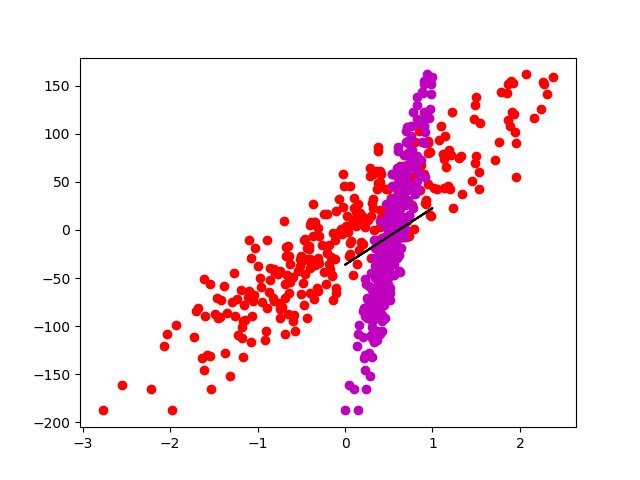

In [12]:
lasso=Lasso(alpha=10,max_iter=10000).fit(X_train,y_train)

plt.figure()
plt.plot(X,y,'ro')
plt.plot(X_scaled,y,'mo')
plt.plot(X_scaled,X_scaled*lasso.coef_+lasso.intercept_,'k-')

## Lasso VS Ridge.

Ambos modelos son formas de regularizar modelos lineales.<br>
En Ridge los coeficientes siguen una distribución normal y en Lasso una distribución Laplaciana.<br>
Ridge es más fácil de implementar y más fácil de computar.<br>
Normalmente según nuestros datos usaremos:<br>
* Ridge: Cuando tenemos muchas variables con efectos de pequeño/mediano tamaño.<br>
* Lasso: Cuando tenemos pocas variables con efectos de mediano/gran tamaño.<br>

En muchos casos recurriremos a realizar un modelo de cada y comparar resultados mediante estimaciones oportunas.